In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read the grayscale image
img = cv2.imread('program2.jpg', cv2.IMREAD_GRAYSCALE)


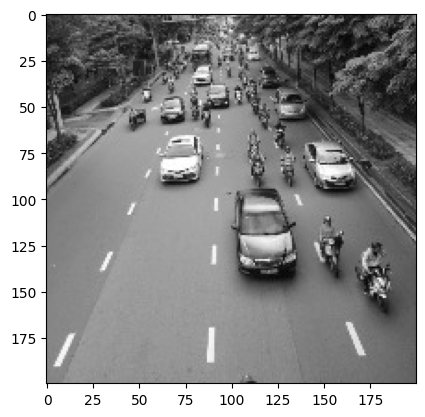

In [11]:
plt.imshow(img,cmap="gray")

In [17]:
# Function to add Salt-and-Pepper noise
def add_salt_pepper_noise(image, prob=0.02):
    noisy_image = image.copy()
    num_pixels = int(prob * image.size)

    # Add Salt noise
    coords = [np.random.randint(0, i - 1, num_pixels // 2) for i in image.shape]
    noisy_image[tuple(coords)] = 255

    # Add Pepper noise
    coords = [np.random.randint(0, i - 1, num_pixels // 2) for i in image.shape]
    noisy_image[tuple(coords)] = 0

    return noisy_image

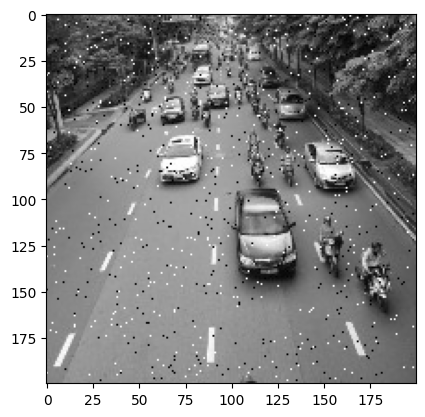

In [18]:
img_with_noise = add_salt_pepper_noise(img,prob=0.02)
plt.imshow(img_with_noise,cmap="gray")

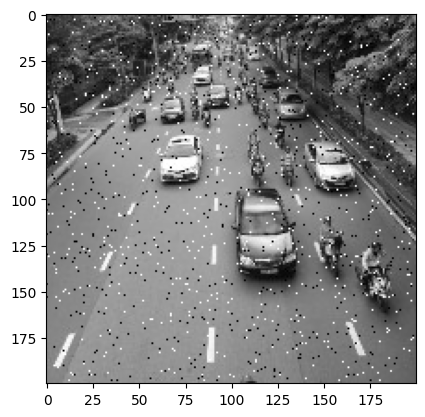

In [19]:
img_with_noise = add_salt_pepper_noise(img,prob=0.03)
plt.imshow(img_with_noise,cmap="gray")

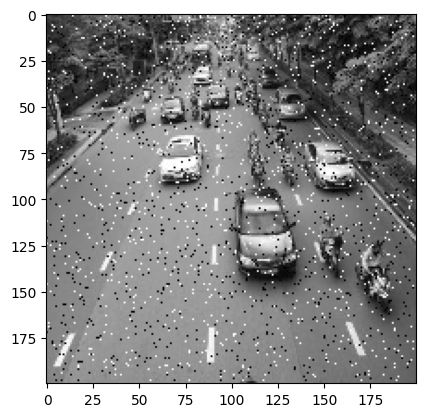

In [20]:
img_with_noise = add_salt_pepper_noise(img,prob=0.05)
plt.imshow(img_with_noise,cmap="gray")

In [ ]:
#Implement Adaptive Median Filter
def adaptive_median_filter(image, max_window_size=7):
    padded_image = np.pad(image, max_window_size//2, mode='edge')
    filtered_image = np.zeros_like(image)

    rows, cols = image.shape
    for i in range(rows):
        for j in range(cols):
            window_size = 3
            while window_size <= max_window_size:
                r_min = max(i, window_size//2)
                r_max = min(i + window_size//2 + 1, rows)
                c_min = max(j, window_size//2)
                c_max = min(j + window_size//2 + 1, cols)

                sub_image = padded_image[r_min:r_max, c_min:c_max]
                min_val = np.min(sub_image)
                max_val = np.max(sub_image)
                med_val = np.median(sub_image)
                pixel_val = image[i, j]

                if min_val < med_val < max_val:
                    if min_val < pixel_val < max_val:
                        filtered_image[i, j] = pixel_val
                    else:
                        filtered_image[i, j] = med_val
                    break
                else:
                    window_size += 2  # Increase window size
            else:
                filtered_image[i, j] = med_val  # If max window size reached

    return filtered_image




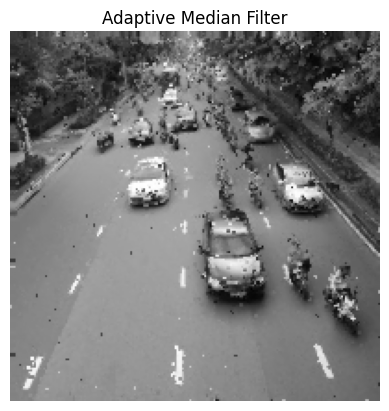

In [22]:
# Apply filter
adaptive_median_filtered = adaptive_median_filter(img_with_noise, max_window_size=7)

# Display the result
plt.imshow(adaptive_median_filtered, cmap='gray')
plt.title('Adaptive Median Filter')
plt.axis('off')
plt.show()